In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.model_selection import train_test_split
import warnings

In [244]:
# Load the data
df = pd.read_csv('data1_train.csv')

In [245]:
# Basic data exploration
print(df.head())

    Feature_1  Feature_2   Feature_3  Target
0   94.870985  88.239326  101.497093       0
1   97.684482  84.837474   90.892151       0
2   94.648343  77.467282   87.646104       0
3   94.635471  85.327735   99.851568       0
4  104.397011  84.097116   98.211326       0


In [246]:
print(df.shape)

(800, 4)


In [247]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature_1  800 non-null    float64
 1   Feature_2  800 non-null    float64
 2   Feature_3  800 non-null    float64
 3   Target     800 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 25.1 KB
None


In [248]:
print(df.isnull().sum())

Feature_1    0
Feature_2    0
Feature_3    0
Target       0
dtype: int64


In [249]:
print(df.describe())

        Feature_1   Feature_2   Feature_3      Target
count  800.000000  800.000000  800.000000  800.000000
mean    93.865307   78.370452   86.557571    1.012500
std      8.264920    5.420918    8.413439    0.820479
min     71.718690   63.794491   67.089600    0.000000
25%     86.570167   74.572013   79.539101    0.000000
50%     96.075213   77.986860   87.877314    1.000000
75%    100.394055   81.823563   93.050799    2.000000
max    111.952780   95.780956  107.830983    2.000000


In [250]:
print(df.corr()['Target'])

Feature_1    0.056738
Feature_2   -0.601941
Feature_3   -0.848050
Target       1.000000
Name: Target, dtype: float64


In [251]:
# 3D Scatter plot
fig = px.scatter_3d(df, x='Feature_1', y='Feature_2', z='Feature_3', color='Target')
fig.show()

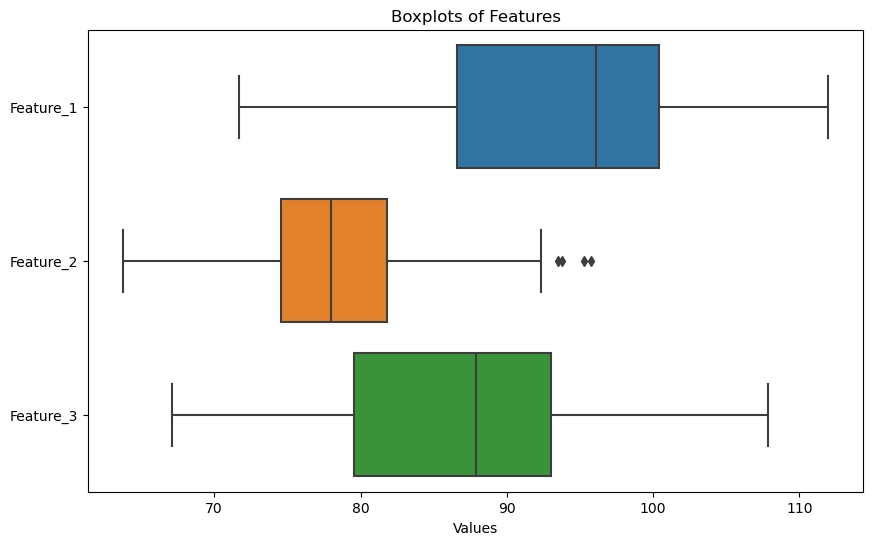

In [252]:
# Boxplot before removing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.drop(columns=['Target']), orient='h')
plt.title('Boxplots of Features')
plt.xlabel('Values')
plt.show()

In [253]:
# Function to remove outliers
def no_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]
    return df

In [254]:
# Remove outliers
df = no_outliers(df, ['Feature_1', 'Feature_2', 'Feature_3'])

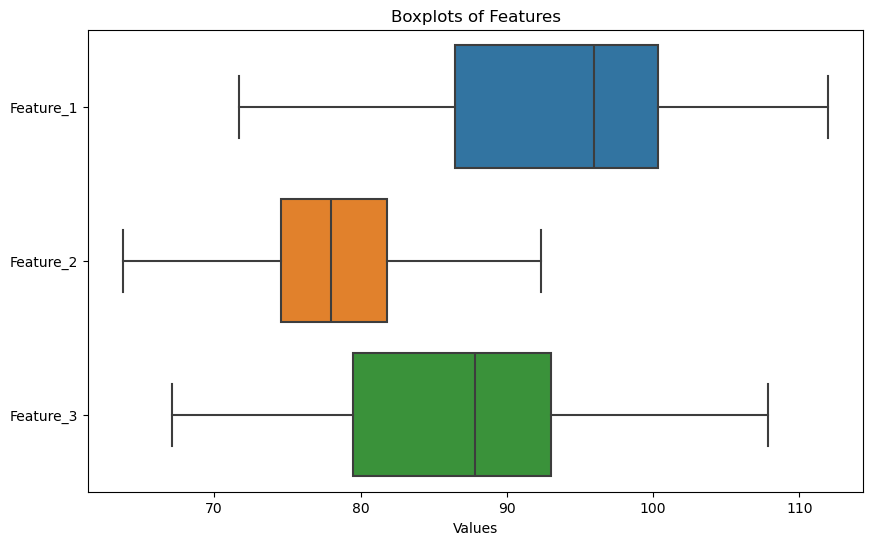

In [255]:
# Boxplot after removing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.drop(columns=['Target']), orient='h')
plt.title('Boxplots of Features')
plt.xlabel('Values')
plt.show()

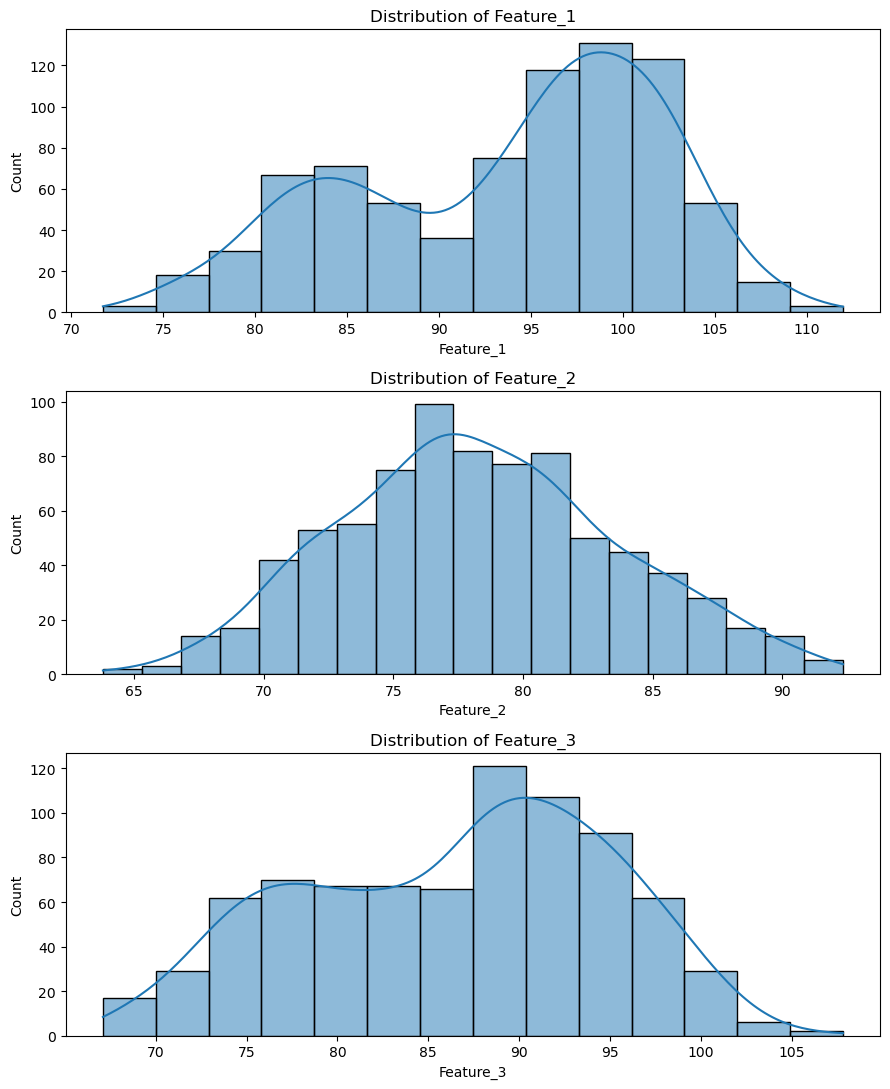

In [256]:
# Ignore future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Plot histograms of features
plt.figure(figsize=(9, 11))
plt.subplot(3, 1, 1)
sns.histplot(df['Feature_1'], kde=True)
plt.title('Distribution of Feature_1')
plt.subplot(3, 1, 2)
sns.histplot(df['Feature_2'], kde=True)
plt.title('Distribution of Feature_2')
plt.subplot(3, 1, 3)
sns.histplot(df['Feature_3'], kde=True)
plt.title('Distribution of Feature_3')
plt.tight_layout()
plt.show()

In [257]:
# Check skewness
print(df['Feature_1'].skew())
print(df['Feature_2'].skew())
print(df['Feature_3'].skew())

-0.4690760223267102
0.15455838954670664
-0.2187590457930496


In [258]:
# Apply PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
df[['Feature_1', 'Feature_2', 'Feature_3']] = pt.fit_transform(df[['Feature_1', 'Feature_2', 'Feature_3']])

In [259]:
# Check skewness again
print(df['Feature_1'].skew())
print(df['Feature_2'].skew())
print(df['Feature_3'].skew())

-0.11426424821703406
-0.00032401580019675503
-0.06054766593989175


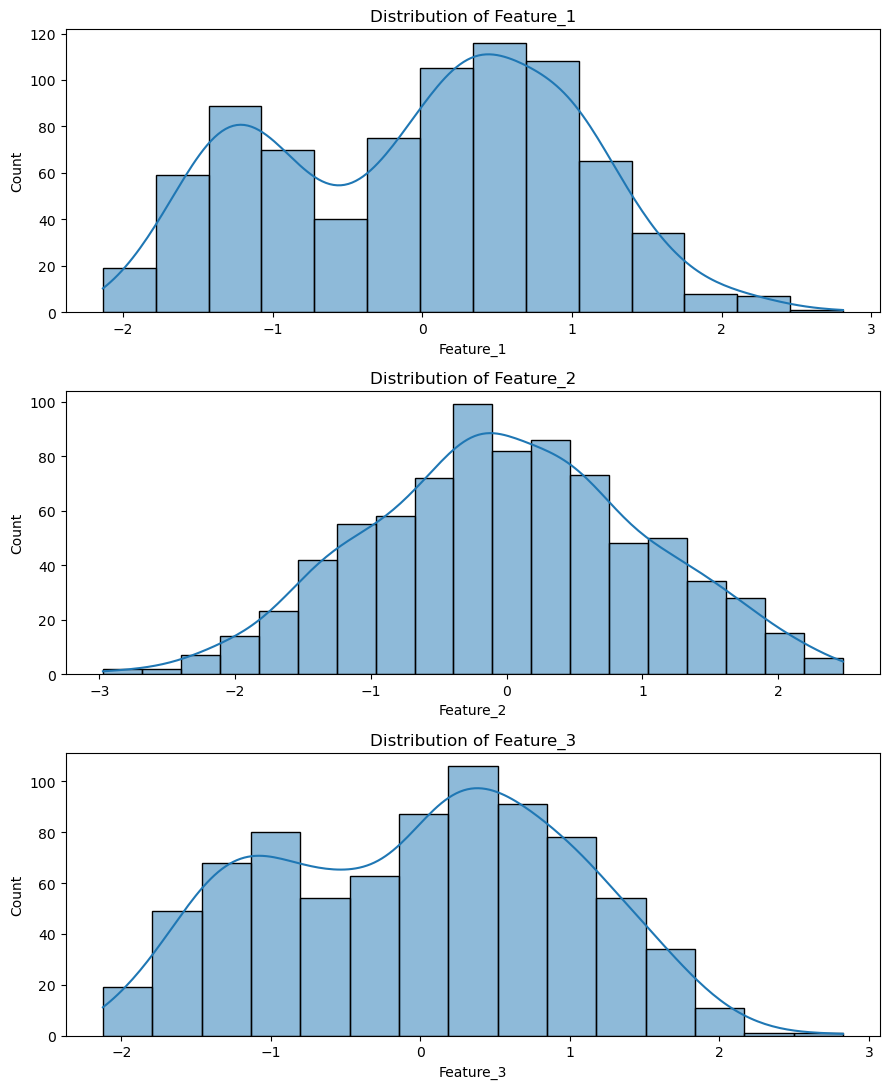

In [260]:
# Plot histograms again after transformation
plt.figure(figsize=(9, 11))

plt.subplot(3, 1, 1)
sns.histplot(df['Feature_1'], kde=True)
plt.title('Distribution of Feature_1')

plt.subplot(3, 1, 2)
sns.histplot(df['Feature_2'], kde=True)
plt.title('Distribution of Feature_2')

plt.subplot(3, 1, 3)
sns.histplot(df['Feature_3'], kde=True)
plt.title('Distribution of Feature_3')

plt.tight_layout()
plt.show()

In [261]:
# Split the data into features and target
X = df.drop(columns=['Target'])
y = df['Target']
y = pd.get_dummies(y, dtype='int')  # Removed drop_first=True

In [262]:
# Train-test split
X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size=0.3, random_state=45)

In [263]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [264]:
# Function to ensure data is a numpy array
def ensure_numpy_array(data):
    if isinstance(data, pd.DataFrame):
        return data.to_numpy()
    elif isinstance(data, np.ndarray):
        return data
    elif isinstance(data, (pd.Series, list)):
        return np.array(data)
    else:
        raise ValueError("Unsupported data type")

In [265]:
X_train = ensure_numpy_array(X_train)
Y_train = ensure_numpy_array(Y_train)
X_val = ensure_numpy_array(X_val)
Y_val = ensure_numpy_array(Y_val)

In [266]:
# Load and preprocess test data
df_test = pd.read_csv('data1_test.csv')

print(df_test.head())

    Feature_1  Feature_2  Feature_3  Target
0   97.533783  88.329103  98.191966       0
1  102.838058  78.783627  90.867559       0
2   95.155724  86.679155  94.861119       0
3  102.838797  87.504581  99.622361       0
4   99.238078  86.704614  91.685225       0


In [267]:
df_test[['Feature_1', 'Feature_2', 'Feature_3']] = pt.transform(df_test[['Feature_1', 'Feature_2', 'Feature_3']])

In [268]:
X_test = df_test.drop(columns=['Target'])
Y_test = df_test['Target']

In [269]:
Y_test = pd.get_dummies(Y_test, dtype='int')  # Removed drop_first=True

In [270]:
X_test = scaler.transform(X_test)
X_test = ensure_numpy_array(X_test)
Y_test = ensure_numpy_array(Y_test)

In [271]:
class SoftmaxRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
    
    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        n_classes = y.shape[1]

        self.weights = np.zeros((n_features, n_classes))
        self.bias = np.zeros((1, n_classes))
        
        for _ in range(self.n_iterations):
            z = np.dot(X, self.weights) + self.bias
            y_predicted = self.softmax(z)
            
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y, axis=0, keepdims=True)
            
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    
    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_predicted = self.softmax(z)
        return np.argmax(y_predicted, axis=1)


In [272]:
def grid_search(X_train, y_train, X_val, y_val, param_grid):
    best_params = None
    best_accuracy = 0
    
    for params in ParameterGrid(param_grid):
        model = SoftmaxRegression(learning_rate=params['learning_rate'], n_iterations=params['n_iterations'])
        model.fit(X_train, y_train)
        
        y_val_pred = model.predict(X_val)
        accuracy = accuracy_score(np.argmax(y_val, axis=1), y_val_pred)
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = params
            
    return best_params

In [273]:
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_iterations': [500, 1000, 2000]
}

# Perform grid search
best_params = grid_search(X_train, y_train, X_val, y_val, param_grid)

In [274]:
# Extract best hyperparameters
best_lr = best_params['learning_rate']
best_n_iter = best_params['n_iterations']

In [275]:
print(f" best learning rate {best_lr}")
print(f" best number of iterations {best_n_iter}")

 best learning rate 0.01
 best number of iterations 500


In [276]:
# Combine the training and validation sets for final training
X_final_train = np.concatenate((X_train, X_val), axis=0)
y_final_train = np.concatenate((y_train, y_val), axis=0)

In [277]:
# Train the final model with the best hyperparameters
best_model = SoftmaxRegression(learning_rate=best_lr, n_iterations=best_n_iter)
best_model.fit(X_final_train, y_final_train)

In [278]:
# Evaluate the final model on test set
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(np.argmax(y_test, axis=1), y_test_pred)
print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.975


In [279]:
# Plot decision boundaries
def plot_decision_boundary(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    feature_3_mean = np.mean(X[:, 2])
    X_pred = np.c_[xx.ravel(), yy.ravel(), np.full_like(xx.ravel(), feature_3_mean)]
    
    Z = model.predict(X_pred)
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=20, cmap=plt.cm.RdYlBu)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    legend = plt.legend(*scatter.legend_elements(), title="Classes")
    plt.gca().add_artist(legend)
    plt.show()

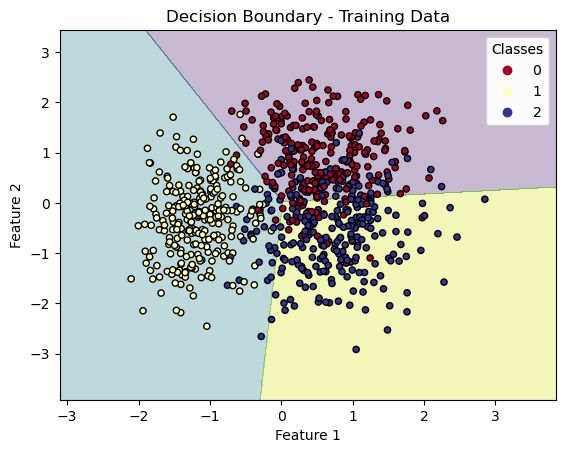

In [280]:
# Plot decision boundaries for training and test data
plot_decision_boundary(X_final_train, np.argmax(y_final_train, axis=1), best_model, 'Decision Boundary - Training Data')

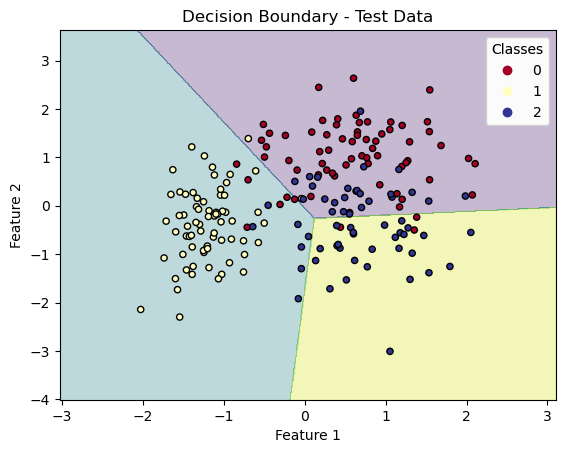

In [281]:
plot_decision_boundary(X_test, np.argmax(y_test, axis=1), best_model, 'Decision Boundary - Test Data')

In [282]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Assuming y_final_train and y_train are one-hot encoded
y_final_train_labels = np.argmax(y_final_train, axis=1)
y_train_labels = np.argmax(y_train, axis=1)  # assuming y_train is also one-hot encoded
# Ensure y_test is in label format
y_test_labels = np.argmax(y_test, axis=1) if y_test.ndim > 1 else y_test

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'saga'],
    'max_iter': [500, 1000, 2000]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(LogisticRegression(multi_class='multinomial'), param_grid, cv=5, n_jobs=-1)

In [283]:
# Fit the model using the training data
grid_search.fit(X_train, y_train_labels)

GridSearchCV(cv=5, estimator=LogisticRegression(multi_class='multinomial'),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [500, 1000, 2000],
                         'solver': ['lbfgs', 'saga']})

In [284]:
# Print the best hyperparameters and the best cross-validation accuracy
print(f"Best Params: {grid_search.best_params_}, Best Cross-Validation Accuracy: {grid_search.best_score_}")

Best Params: {'C': 100, 'max_iter': 500, 'solver': 'lbfgs'}, Best Cross-Validation Accuracy: 0.9730855855855856


In [285]:
# Train the final model with the best hyperparameters
best_model = grid_search.best_estimator_
best_model.fit(X_final_train, y_final_train_labels)

LogisticRegression(C=100, max_iter=500, multi_class='multinomial')

In [286]:
# Evaluate the final model on the test set
y_test_pred = best_model.predict(X_test)

In [287]:
test_accuracy = accuracy_score(y_test_labels, y_test_pred)
print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.98
